## Итоговая работа по курсу Feature engineering

Чек-лист:
1. Загрузите датасет taxi.csv.
2. Посмотрите на данные. Отобразите общую информацию по признакам (вспомните о describe и info). Напишите в markdown свои наблюдения.
3. Выявите пропуски, а также возможные причины их возникновения. Решите, что следует сделать с ними. Напишите в markdown свои наблюдения.
4. Оцените зависимости переменных между собой. Используйте корреляции. Будет хорошо, если воспользуетесь profile_report. Напишите в markdown свои наблюдения.
5. Определите стратегию преобразования категориальных признаков (т.е. как их сделать адекватными для моделей).
6. Найдите признаки, которые можно разделить на другие, или преобразовать в другой тип данных. Удалите лишние, при необходимости.
7. Разделите выборку на обучаемую и тестовую.
8. Обучите модель. Напишите в markdown свои наблюдения по полученным результатам. Хорошие результаты дают классификаторы RandomForest и XGBoost


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('taxi.csv')
data.head()

offer_gk  weekday_key  hour_key  driver_gk  order_gk  driver_latitude  \
0   1105373            5        20       6080    174182        55.818842   
1    759733            5        14       6080    358774        55.805342   
2    416977            6        14       6080    866260        55.813978   
3    889660            2         6       6080    163522        55.745922   
4   1120055            4        16       6080    506710        55.803578   

   driver_longitude  origin_order_latitude  origin_order_longitude  \
0         37.334562              55.814567               37.355010   
1         37.515023              55.819329               37.466398   
2         37.347688              55.814827               37.354074   
3         37.421748              55.743469               37.431130   
4         37.521602              55.812559               37.527407   

   distance_km  duration_min offer_class_group ride_type_desc  driver_response  
0       -1.000        -1.000           Economy        private                0  
1       18.802        25.217          Standard        private                1  
2        6.747         9.800           Economy        private                0  
3       -1.000        -1.000           Economy        private                1  
4       12.383        19.250           Economy        private                1

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
offer_gk                  100000 non-null int64
weekday_key               100000 non-null int64
hour_key                  100000 non-null int64
driver_gk                 100000 non-null int64
order_gk                  100000 non-null int64
driver_latitude           100000 non-null float64
driver_longitude          100000 non-null float64
origin_order_latitude     100000 non-null float64
origin_order_longitude    100000 non-null float64
distance_km               100000 non-null float64
duration_min              100000 non-null float64
offer_class_group         100000 non-null object
ride_type_desc            100000 non-null object
driver_response           100000 non-null int64
dtypes: float64(6), int64(6), object(2)
memory usage: 10.7+ MB


- датасет состоит из 100 тыс строк и 14 столбцов
- пропущенные значения отсутствуют
- есть два категориальных признака offer_class_group ride_type_desc  

In [324]:
data.describe()

offer_gk    weekday_key       hour_key      driver_gk  \
count  1.000000e+05  100000.000000  100000.000000  100000.000000   
mean   5.662189e+05       3.159860      13.827790    3446.376360   
std    3.259360e+05       2.054222       7.306496    2038.738677   
min    4.000000e+00       0.000000       0.000000      14.000000   
25%    2.855552e+05       1.000000       8.000000    1421.000000   
50%    5.656715e+05       3.000000      16.000000    3506.500000   
75%    8.487198e+05       5.000000      20.000000    5242.000000   
max    1.130355e+06       6.000000      23.000000    6806.000000   

           order_gk  driver_latitude  driver_longitude  origin_order_latitude  \
count  100000.00000    100000.000000     100000.000000          100000.000000   
mean   460867.01291        55.700824         37.492292              55.772440   
std    266064.98953         2.135903          1.454640               0.665985   
min        18.00000        -1.000000         -1.000000              -1.000000   
25%    229178.50000        55.708651         37.413497              55.708032   
50%    462420.00000        55.772904         37.533664              55.772561   
75%    690894.00000        55.960667         37.624113              55.962000   
max    920344.00000        56.174097         38.280547              56.311121   

       origin_order_longitude    distance_km   duration_min  driver_response  
count           100000.000000  100000.000000  100000.000000    100000.000000  
mean                37.541637      18.393518      23.134841         0.492480  
std                  0.467758      41.129296      33.890105         0.499946  
min                 -1.000000      -1.000000      -1.000000         0.000000  
25%                 37.407117      -1.000000      -1.000000         0.000000  
50%                 37.532537      10.411500      19.700000         0.000000  
75%                 37.624358      30.665250      37.867000         1.000000  
max                 38.243608    5234.283000    3958.283000         1.000000

In [321]:
import pandas_profiling

In [322]:
data.profile_report()

в признаках координат, дистанции и времени присутствует значение -1, что не соответствует логике признака. 
- координаты водителя 140 значений
- координаты заказа 13
- дистанция 26207
- время 26207

координаты водителя и заказа со значением -1, удаляю т.к. их малое количество. А с дистанцией и временем работаю дальше, так как составляют треть от данных

In [5]:
data_1 = data.loc[(data.driver_latitude > 0) & (data.origin_order_latitude > 0)]

In [7]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [8]:
from geopy.distance import geodesic

Делаю расчет географического расстояния между водителем и заказом. Создаю столбец с новым значением

In [9]:
data_1 = data_1.reset_index()

In [10]:
data_1 = data_1.drop('index', axis=1)

In [12]:
i = 0
list_ = []
while i < 99846:
    list_.append(geodesic((data_1.driver_latitude[i], data_1.driver_longitude[i]),  (data_1.origin_order_latitude[i], data_1.origin_order_longitude[i])).km)
    i += 1

In [13]:
data_1['dist_circle'] = pd.DataFrame(list_)

In [14]:
data_1.head()

offer_gk  weekday_key  hour_key  driver_gk  order_gk  driver_latitude  \
0   1105373            5        20       6080    174182        55.818842   
1    759733            5        14       6080    358774        55.805342   
2    416977            6        14       6080    866260        55.813978   
3    889660            2         6       6080    163522        55.745922   
4   1120055            4        16       6080    506710        55.803578   

   driver_longitude  origin_order_latitude  origin_order_longitude  \
0         37.334562              55.814567               37.355010   
1         37.515023              55.819329               37.466398   
2         37.347688              55.814827               37.354074   
3         37.421748              55.743469               37.431130   
4         37.521602              55.812559               37.527407   

   distance_km  duration_min offer_class_group ride_type_desc  \
0       -1.000        -1.000           Economy        private   
1       18.802        25.217          Standard        private   
2        6.747         9.800           Economy        private   
3       -1.000        -1.000           Economy        private   
4       12.383        19.250           Economy        private   

   driver_response  dist_circle  
0                0     1.367355  
1                1     3.423260  
2                0     0.411356  
3                1     0.649440  
4                1     1.064116

Добавляю столбец со значением отклонения географического расстояния от расстояния по маршруту

In [15]:
data_1['dev_dis'] = data_1.distance_km / data_1.dist_circle

удаляю маршруты с дистанцией более 150 км, таких 78 значений

In [43]:
data_1 = data_1.loc[data_1.distance_km < 150]

Создаю функцию, которая расчитывает коэфициент корректировки географического расстояния

In [66]:
def corr_dist(dist):
    if 0 < dist < 10:
        return dist * data_1.dev_dis.loc[(data_1.distance_km > 0) & (data_1.distance_km < 10) & (data_1.dist_circle > 1)].mean()
    elif 10 <= dist < 20:
        return dist * data_1.dev_dis.loc[(data_1.distance_km >= 10) & (data_1.distance_km < 20) & (data_1.dist_circle > 1)].mean()
    elif 20 <= dist < 30:
        return dist * data_1.dev_dis.loc[(data_1.distance_km >= 20) & (data_1.distance_km < 30) & (data_1.dist_circle > 1)].mean()
    elif 30 <= dist < 50:
        return dist * data_1.dev_dis.loc[(data_1.distance_km >= 30) & (data_1.distance_km < 50) & (data_1.dist_circle > 1)].mean()
    elif 50 <= dist < 70:
        return dist * data_1.dev_dis.loc[(data_1.distance_km >= 50) & (data_1.distance_km < 70) & (data_1.dist_circle > 1)].mean()
    elif 70 <= dist < 100:
        return dist * data_1.dev_dis.loc[(data_1.distance_km >= 70) & (data_1.distance_km < 100) & (data_1.dist_circle > 1)].mean()
    elif 100 <= dist < 150:
        return dist * data_1.dev_dis.loc[(data_1.distance_km >= 100) & (data_1.distance_km < 150) & (data_1.dist_circle > 1)].mean()

Создаю столбец со значениями скорректированными на среднее отклонение, по известным маршрутам

In [102]:
data_1['corr_dist'] = data_1.dist_circle.apply(corr_dist)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


значения меньше 1 в столбце distance_km заполняю созданными данными, таким образо избавился от не заполненных значений

In [199]:
data_1.loc[data_1['distance_km'] < 1, 'distance_km'] = data_1.corr_dist

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [ ]:
В данных осталось 26269 некорректных значений duration_min. Добавляю столбец со скоростью прохождения маршрута speed

In [212]:
data_1['speed'] = data_1.distance_km / data_1.duration_min * 60

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


считаю среднюю скорость прохождения маршрута

In [215]:
data_1.loc[data_1['duration_min'] > 0]['speed'].mean()

41.53154661298029

Теперь использую среднюю скорость, нахожу недостающие значения времени в пути

In [220]:
data_1.loc[data_1['duration_min'] < 1, 'duration_min'] = data_1.distance_km / 41.53 * 60

Перевожу категориальные признаки offer_class_group, ride_type_desc в вещественные

In [227]:
from sklearn import preprocessing

In [228]:
col = preprocessing.LabelEncoder()
data_1['offer_class_group'] = col.fit_transform(data_1['offer_class_group'])
data_1['ride_type_desc'] = col.fit_transform(data_1['ride_type_desc'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Удаляю из данных созданные вспомогательные столбцы, и столбцы на мой взгляд не оказывающие влияние на модель (номера заказов и предложений, координаты

In [231]:
data_1.columns

Index(['offer_gk', 'weekday_key', 'hour_key', 'driver_gk', 'order_gk',
       'driver_latitude', 'driver_longitude', 'origin_order_latitude',
       'origin_order_longitude', 'distance_km', 'duration_min',
       'offer_class_group', 'ride_type_desc', 'driver_response', 'dist_circle',
       'dev_dis', 'corr_dist', 'fin_dist', 'speed'],
      dtype='object')

In [303]:
df = data_1[['weekday_key', 'hour_key', 'driver_gk', 'distance_km', 'duration_min', 'offer_class_group', 'ride_type_desc', 'driver_response']]

In [304]:
df = df.dropna()

In [236]:
import seaborn as sns

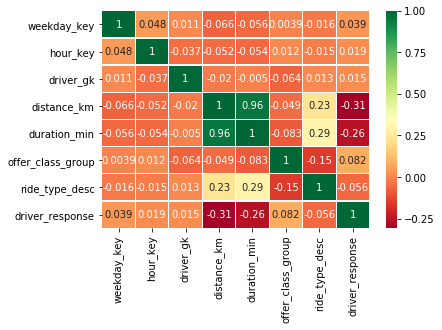

In [305]:
sns.heatmap(df.corr(), annot=True,cmap='RdYlGn',linewidths=0.2)

Для дальнейшего обучения, удалаю один из признаков с взаимной высокой корреляцией (duration)

In [306]:
df = data_1[['weekday_key', 'hour_key', 'driver_gk', 'distance_km', 'offer_class_group', 'ride_type_desc', 'driver_response']]

выделяю таргет который необходимо предсказать

In [298]:
X = df.drop(['driver_response'], axis=1)
y = df['driver_response']

разделяю данные на тренировочные и тестовые

In [238]:
from sklearn.model_selection import train_test_split

In [299]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

создаю и оцениваю качество модели

In [242]:
from sklearn.ensemble import RandomForestClassifier

In [300]:
model = RandomForestClassifier()

In [324]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [307]:
score = model.score(X_test, y_test)
print(f'Качество модели: {score:.2f}')

Качество модели: 0.77


In [308]:
from sklearn.metrics import classification_report

In [309]:
model_pred = model.predict(X_test)

print(classification_report(y_test, model_pred))

              precision    recall  f1-score   support

           0       0.78      0.76      0.77     15185
           1       0.76      0.78      0.77     14732

    accuracy                           0.77     29917
   macro avg       0.77      0.77      0.77     29917
weighted avg       0.77      0.77      0.77     29917



In [323]:
from sklearn.model_selection import cross_val_score

In [325]:
scores = cross_val_score(model, X_train, y_train, cv=3)
print(scores)

[0.76005673 0.75365309 0.7547705 ]


Для эксперемента строю модель на данных без обработки

In [140]:
df_lob = data.copy()

In [134]:
from sklearn import preprocessing

In [310]:
col = preprocessing.LabelEncoder()
df_lob['offer_class_group'] = col.fit_transform(df_lob['offer_class_group'])
df_lob['ride_type_desc'] = col.fit_transform(df_lob['ride_type_desc'])

In [82]:
from sklearn.model_selection import train_test_split

In [311]:
XX = df_lob.drop(['driver_response'], axis=1)
yy = df_lob['driver_response']

In [312]:
X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(XX, yy, test_size=0.3)

In [89]:
from sklearn.ensemble import RandomForestClassifier

In [326]:
model = RandomForestClassifier()
model.fit(X_train_l, y_train_l)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [314]:
score = model.score(X_test_l, y_test_l)
print(f'Качество модели: {score:.2f}')

Качество модели: 0.81


In [94]:
from sklearn.metrics import classification_report

In [315]:
model_pred = model.predict(X_test_l)

print(classification_report(y_test_l, model_pred))

              precision    recall  f1-score   support

           0       0.85      0.76      0.80     15102
           1       0.78      0.86      0.82     14898

    accuracy                           0.81     30000
   macro avg       0.81      0.81      0.81     30000
weighted avg       0.81      0.81      0.81     30000



In [327]:
scores = cross_val_score(model, X_train_l, y_train_l, cv=3)
print(scores)

[0.79977715 0.79976857 0.80041143]
